In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import deque
from sklearn.utils import shuffle
from tqdm import tqdm
import random
import copy
import os
import sys

In [2]:
print("本地路径 = ", sys.argv[0], "\n")

path1 = os.getcwd() # 获取当前工作目录路径
path2 = os.path.abspath('.') # 获取当前工作目录路径
path3 = os.path.abspath('test.txt') # 获取当前目录文件下的工作目录路径
path4 = os.path.abspath('..') # 获取当前工作的父目录 ！注意是父目录路径
path5 = os.path.abspath(os.curdir) # 获取当前工作目录路径

print("当前的代码绝对路径 = ", path1)
print("获取当前工作目录路径 = ", path2)
print("获取当前目录文件下的工作目录路径 = ", path3)
print("获取当前工作的父目录 = ", path4)
print("获取当前工作目录路径 = ", path5)

本地路径 =  d:\python\lib\site-packages\ipykernel_launcher.py 

当前的代码绝对路径 =  C:\Users\程琪皓\Desktop\作家按照年份处理数据
获取当前工作目录路径 =  C:\Users\程琪皓\Desktop\作家按照年份处理数据
获取当前目录文件下的工作目录路径 =  C:\Users\程琪皓\Desktop\作家按照年份处理数据\test.txt
获取当前工作的父目录 =  C:\Users\程琪皓\Desktop
获取当前工作目录路径 =  C:\Users\程琪皓\Desktop\作家按照年份处理数据


## 整理数据（训练集和验证集）

In [3]:
class Buffer(object):
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, input_real,output_real):
        input_real = np.expand_dims(input_real, 0)
        output_real = np.expand_dims(output_real, 0)  # 这里应该是为了方便神经网络的训练
        self.buffer.append(( input_real,output_real))

    def sample(self, batch_size):
        iput,oput = zip(*random.sample(self.buffer, batch_size))
        concat_input = np.concatenate(iput)
        concat_output = np.concatenate(oput)
        return concat_input, concat_output

    def __len__(self):
        return len(self.buffer)

    
training_set = Buffer(capacity = 100000)
validation_set = Buffer(capacity = 10000)

In [4]:
full_music_data = {"danceability":[0.5263203874313606,0.16403205144827973],
                    "energy":[0.5342478371079926,0.26447724025183267],
                    "valence":[0.5332812944885094,0.2585376133654879],
                    "tempo":[118.96853772625585,29.925255322835987],
                    "loudness":[-10.755944010575554,5.067612837357291],
                    "acousticness":[0.4190568774831198,0.35370999027336875],
                    "instrumentalness":[0.1255745396816148,0.2724918312399652],
                    "liveness":[0.20700085794183445,0.18610339608517842],
                    "speechiness":[0.06380584502745576,0.07610388534934469],
                    "explicit":[0.037085621313809235,0.18897163280656168],
                    "duration_ms":[238590.92141549726,108823.17603973577],
                    "mode":[0.7219951189749847,0.4480158112737567],
                    "popularity":[35.69332926581249,17.262527298425432],}
print(len(full_music_data))

13


In [5]:
def read_genre(genre_id, directory = "genre"):
    path = "{}/{}.csv".format(directory, genre_id)
    genre_data = pd.read_csv(path)
    return genre_data

In [6]:
genre_data = read_genre(1)
# print(genre_data)

In [7]:


genre_num = 19

columns = ["danceability","energy", "valence", "tempo", "loudness", "acousticness", "instrumentalness", "liveness", "speechness",
           "explicit", "duration_ms", "liveness", "mode","popularity"]

diction = {3:"danceability",4:"energy", 5: "valence", 6: "tempo", 7: "loudness",9:"mode" ,10: "acousticness", 11:"instrumentalness", 12:"liveness", 13:"speechiness",
           14:"explicit", 15:"duration_ms",16:"popularity"}
    

for genre_id in range(genre_num):
    genre_data = read_genre(genre_id)
    genre_data_shuffled = shuffle(genre_data)
    data = genre_data_shuffled.values
    sample = []
    
    output_real = genre_id
    
    for i in [3,4,5,6,7,9, 10,11,12,13,14,15]:
        column = diction[i]
        mean, var = full_music_data[column]
        temp = (data[:,i] - mean) / var
        sample.append(temp)
    
    data = np.vstack(sample).T
    for i in range(len(data)):
        input_real = data[i]
        if random.uniform(0,1) > 0.1:
            training_set.push(input_real, output_real)
        else:
            validation_set.push(input_real, output_real)
    print(data.shape)
    

print(data[0])

print(len(training_set))
print(len(validation_set))


(6942, 12)
(824, 12)
(47513, 12)
(1058, 12)
(6279, 12)
(10340, 12)
(1256, 12)
(1397, 12)
(710, 12)
(1460, 12)
(7608, 12)
(4674, 12)
(2352, 12)
(1421, 12)
(329, 12)
(243, 12)
(1332, 12)
(56, 12)
(271, 12)
[0.7052256650287271 -1.0445051409525905 -0.17127602406505568
 1.2663371411513438 -1.6384550785364274 11.780845113521965
 1.3484016161043948 -0.4247266391618734 -0.47823338968569545
 -0.23396762130764304 -0.1962496738956129 -0.590719033894256]
86648
9417


In [8]:
genre_list = []
for genre_id in range(genre_num):
    genre_data = read_genre(genre_id)
    genre_list.append(len(genre_data))
print(genre_list)
graph_num_list = np.sqrt(np.array(genre_list)).astype(int)
print(graph_num_list)
len(graph_num_list)

[6942, 824, 47513, 1058, 6279, 10340, 1256, 1397, 710, 1460, 7608, 4674, 2352, 1421, 329, 243, 1332, 56, 271]
[ 83  28 217  32  79 101  35  37  26  38  87  68  48  37  18  15  36   7
  16]


19

In [9]:
graph_set = []
for genre_id in range(genre_num):
    genre_data = read_genre(genre_id)
    genre_data_shuffled = shuffle(genre_data)
    num = 0
    for i,r in tqdm(genre_data_shuffled.iterrows(),):
        if num < graph_num_list[genre_id]:
            graph_set.append(input_real)
            num += 1
        else:
#             print(num)
            break
print(len(graph_set))

83it [00:00, 10356.00it/s]
28it [00:00, 9386.98it/s]
217it [00:00, 5429.60it/s]
32it [00:00, 10659.81it/s]
79it [00:00, 11284.61it/s]
101it [00:00, 10961.10it/s]
35it [00:00, 17486.68it/s]
37it [00:00, 12324.43it/s]
26it [00:00, 8666.61it/s]
38it [00:00, 12659.54it/s]
87it [00:00, 11128.19it/s]
68it [00:00, 13611.37it/s]
48it [00:00, 15960.57it/s]
37it [00:00, 12336.19it/s]
18it [00:00, 17967.03it/s]
15it [00:00, 15022.58it/s]
36it [00:00, 12000.87it/s]
7it [00:00, 6997.17it/s]
16it [00:00, 16004.98it/s]

1008


In [10]:

input_dim = 12
latent_size = 2
output_dim = 19

In [29]:

Net_encoder = torch.nn.Sequential(
    torch.nn.Linear(input_dim, input_dim, bias=False, ),
    torch.nn.BatchNorm1d(input_dim),
    torch.nn.LeakyReLU(),
    
    torch.nn.Linear(input_dim, input_dim, bias=False),
    torch.nn.BatchNorm1d(input_dim),
    torch.nn.LeakyReLU(),
    
    torch.nn.Linear(input_dim, latent_size, bias=False),
    torch.nn.BatchNorm1d(latent_size),
    torch.nn.Sigmoid(),
)

classifier = torch.nn.Sequential(
    torch.nn.Linear(latent_size, output_dim, bias=False, ),
    torch.nn.BatchNorm1d(output_dim),
    torch.nn.Sigmoid(),
    
    torch.nn.Linear(output_dim, output_dim, bias=False, ),
    torch.nn.BatchNorm1d(output_dim),
    torch.nn.LeakyReLU(),
    
    torch.nn.Linear(output_dim, output_dim, bias=False, ),
    torch.nn.BatchNorm1d(output_dim),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(output_dim, output_dim, bias=False, ),
    torch.nn.BatchNorm1d(output_dim),
    torch.nn.LeakyReLU(),
)



In [30]:
def evaluation():
    pass
Net_encoder = Net_encoder.double()
classifier = classifier.double()

0:   5%|███▋                                                                     | 1013/20000 [00:09<03:06, 101.65it/s]

accuracy =  0.108 loss =  tensor(2.9053, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  10%|███████▎                                                                 | 2018/20000 [00:19<02:51, 105.13it/s]

accuracy =  0.084 loss =  tensor(2.8946, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  15%|███████████                                                              | 3017/20000 [00:28<02:40, 105.71it/s]

accuracy =  0.087 loss =  tensor(2.8950, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  20%|██████████████▋                                                          | 4010/20000 [00:38<02:33, 104.46it/s]

accuracy =  0.096 loss =  tensor(2.8908, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  25%|██████████████████▎                                                      | 5008/20000 [00:47<02:21, 105.97it/s]

accuracy =  0.095 loss =  tensor(2.8872, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  30%|█████████████████████▉                                                   | 6009/20000 [00:57<02:18, 101.04it/s]

accuracy =  0.101 loss =  tensor(2.8872, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  35%|█████████████████████████▌                                               | 7013/20000 [01:07<02:07, 102.25it/s]

accuracy =  0.09 loss =  tensor(2.8828, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  40%|█████████████████████████████▎                                           | 8016/20000 [01:17<01:52, 106.47it/s]

accuracy =  0.119 loss =  tensor(2.8880, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  45%|████████████████████████████████▉                                        | 9019/20000 [01:26<01:42, 107.31it/s]

accuracy =  0.116 loss =  tensor(2.8953, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  50%|████████████████████████████████████                                    | 10014/20000 [01:35<01:35, 104.28it/s]

accuracy =  0.087 loss =  tensor(2.8851, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  55%|███████████████████████████████████████▋                                | 11014/20000 [01:45<01:24, 105.86it/s]

accuracy =  0.09 loss =  tensor(2.8934, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  60%|███████████████████████████████████████████▊                             | 12015/20000 [01:54<01:23, 96.08it/s]

accuracy =  0.12 loss =  tensor(2.8887, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  65%|██████████████████████████████████████████████▊                         | 13017/20000 [02:04<01:06, 104.97it/s]

accuracy =  0.111 loss =  tensor(2.8852, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  70%|██████████████████████████████████████████████████▍                     | 14010/20000 [02:13<00:58, 102.90it/s]

accuracy =  0.1 loss =  tensor(2.8867, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  75%|██████████████████████████████████████████████████████▊                  | 15010/20000 [02:23<00:50, 98.83it/s]

accuracy =  0.112 loss =  tensor(2.8917, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  80%|█████████████████████████████████████████████████████████▋              | 16014/20000 [02:33<00:39, 101.34it/s]

accuracy =  0.094 loss =  tensor(2.8871, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  85%|█████████████████████████████████████████████████████████████▎          | 17017/20000 [02:42<00:27, 107.04it/s]

accuracy =  0.079 loss =  tensor(2.8847, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  90%|████████████████████████████████████████████████████████████████▊       | 18019/20000 [02:52<00:18, 105.64it/s]

accuracy =  0.103 loss =  tensor(2.8847, dtype=torch.float64, grad_fn=<NllLossBackward>)


0:  95%|████████████████████████████████████████████████████████████████████▍   | 19013/20000 [03:01<00:09, 106.04it/s]

accuracy =  0.087 loss =  tensor(2.8898, dtype=torch.float64, grad_fn=<NllLossBackward>)


0: 100%|████████████████████████████████████████████████████████████████████████| 20000/20000 [03:10<00:00, 104.80it/s]


accuracy =  0.099 loss =  tensor(2.8861, dtype=torch.float64, grad_fn=<NllLossBackward>)


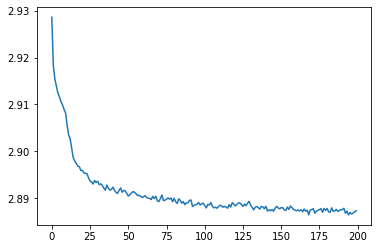

2.886142312092592:   5%|██▉                                                      | 1012/20000 [00:09<03:00, 105.16it/s]

accuracy =  0.079 loss =  tensor(2.8872, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  10%|█████▊                                                   | 2022/20000 [00:19<02:49, 106.10it/s]

accuracy =  0.096 loss =  tensor(2.8844, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  15%|████████▌                                                | 3015/20000 [00:28<02:45, 102.90it/s]

accuracy =  0.094 loss =  tensor(2.8809, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  20%|███████████▍                                             | 4019/20000 [00:38<02:34, 103.18it/s]

accuracy =  0.083 loss =  tensor(2.8902, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  25%|██████████████▎                                          | 5017/20000 [00:48<02:23, 104.61it/s]

accuracy =  0.077 loss =  tensor(2.8864, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  30%|█████████████████▏                                       | 6015/20000 [00:57<02:10, 107.00it/s]

accuracy =  0.079 loss =  tensor(2.8898, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  35%|████████████████████▎                                     | 7012/20000 [01:07<02:10, 99.61it/s]

accuracy =  0.09 loss =  tensor(2.8840, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  40%|██████████████████████▊                                  | 8017/20000 [01:16<01:55, 103.41it/s]

accuracy =  0.085 loss =  tensor(2.8904, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  45%|█████████████████████████▋                               | 9021/20000 [01:26<01:43, 106.23it/s]

accuracy =  0.067 loss =  tensor(2.8847, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  50%|████████████████████████████                            | 10011/20000 [01:35<01:35, 104.59it/s]

accuracy =  0.083 loss =  tensor(2.8856, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  55%|██████████████████████████████▊                         | 11018/20000 [01:45<01:29, 100.37it/s]

accuracy =  0.081 loss =  tensor(2.8923, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  60%|█████████████████████████████████▋                      | 12010/20000 [01:54<01:15, 105.47it/s]

accuracy =  0.086 loss =  tensor(2.8919, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  65%|████████████████████████████████████▍                   | 13012/20000 [02:04<01:06, 105.81it/s]

accuracy =  0.087 loss =  tensor(2.8879, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  70%|███████████████████████████████████████▏                | 14017/20000 [02:13<00:57, 104.52it/s]

accuracy =  0.082 loss =  tensor(2.8892, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  75%|██████████████████████████████████████████              | 15016/20000 [02:23<00:48, 102.98it/s]

accuracy =  0.073 loss =  tensor(2.8939, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  80%|█████████████████████████████████████████████▌           | 16008/20000 [02:33<00:42, 94.09it/s]

accuracy =  0.09 loss =  tensor(2.8880, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  85%|███████████████████████████████████████████████▋        | 17019/20000 [02:43<00:28, 102.95it/s]

accuracy =  0.087 loss =  tensor(2.8827, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  90%|██████████████████████████████████████████████████▍     | 18018/20000 [02:52<00:19, 101.98it/s]

accuracy =  0.103 loss =  tensor(2.8805, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592:  95%|█████████████████████████████████████████████████████▏  | 19011/20000 [03:02<00:09, 101.83it/s]

accuracy =  0.085 loss =  tensor(2.8869, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.886142312092592: 100%|████████████████████████████████████████████████████████| 20000/20000 [03:12<00:00, 104.03it/s]


accuracy =  0.094 loss =  tensor(2.8865, dtype=torch.float64, grad_fn=<NllLossBackward>)


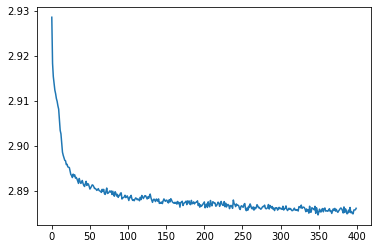

2.8864504301791247:   5%|██▊                                                     | 1019/20000 [00:09<02:56, 107.81it/s]

accuracy =  0.082 loss =  tensor(2.8765, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  10%|█████▋                                                  | 2016/20000 [00:19<02:59, 100.37it/s]

accuracy =  0.066 loss =  tensor(2.8834, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  15%|████████▍                                               | 3012/20000 [00:29<02:46, 102.05it/s]

accuracy =  0.088 loss =  tensor(2.8932, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  20%|███████████▏                                            | 4016/20000 [00:38<02:28, 107.77it/s]

accuracy =  0.081 loss =  tensor(2.8835, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  25%|██████████████                                          | 5013/20000 [00:48<02:20, 106.86it/s]

accuracy =  0.092 loss =  tensor(2.8813, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  30%|████████████████▊                                       | 6014/20000 [00:57<02:14, 103.94it/s]

accuracy =  0.072 loss =  tensor(2.8854, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  35%|███████████████████▋                                    | 7013/20000 [01:07<02:05, 103.10it/s]

accuracy =  0.078 loss =  tensor(2.8860, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  40%|██████████████████████▍                                 | 8015/20000 [01:17<01:55, 103.58it/s]

accuracy =  0.096 loss =  tensor(2.8810, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  45%|█████████████████████████▏                              | 9016/20000 [01:26<01:42, 106.81it/s]

accuracy =  0.078 loss =  tensor(2.8915, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  50%|███████████████████████████▌                           | 10021/20000 [01:36<01:32, 107.55it/s]

accuracy =  0.08 loss =  tensor(2.8848, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  55%|██████████████████████████████▎                        | 11011/20000 [01:45<01:26, 103.47it/s]

accuracy =  0.07 loss =  tensor(2.8806, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  60%|█████████████████████████████████                      | 12016/20000 [01:55<01:16, 103.96it/s]

accuracy =  0.066 loss =  tensor(2.8868, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  65%|███████████████████████████████████▊                   | 13020/20000 [02:04<01:09, 100.94it/s]

accuracy =  0.068 loss =  tensor(2.8836, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  70%|██████████████████████████████████████▌                | 14013/20000 [02:14<00:58, 103.17it/s]

accuracy =  0.083 loss =  tensor(2.8814, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  75%|█████████████████████████████████████████▎             | 15015/20000 [02:23<00:47, 105.54it/s]

accuracy =  0.103 loss =  tensor(2.8804, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  80%|████████████████████████████████████████████           | 16011/20000 [02:33<00:38, 104.56it/s]

accuracy =  0.08 loss =  tensor(2.8844, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  85%|██████████████████████████████████████████████▊        | 17017/20000 [02:42<00:28, 104.98it/s]

accuracy =  0.074 loss =  tensor(2.8882, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  90%|██████████████████████████████████████████████████▍     | 18014/20000 [02:52<00:21, 94.46it/s]

accuracy =  0.082 loss =  tensor(2.8933, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247:  95%|████████████████████████████████████████████████████▎  | 19017/20000 [03:01<00:09, 108.88it/s]

accuracy =  0.075 loss =  tensor(2.8870, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8864504301791247: 100%|███████████████████████████████████████████████████████| 20000/20000 [03:11<00:00, 104.56it/s]

accuracy =  0.086 loss =  tensor(2.8777, dtype=torch.float64, grad_fn=<NllLossBackward>)


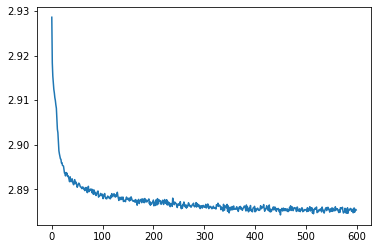

2.877667797246588:   5%|██▉                                                      | 1020/20000 [00:09<02:56, 107.45it/s]

accuracy =  0.08 loss =  tensor(2.8842, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  10%|█████▋                                                   | 2014/20000 [00:19<02:46, 107.97it/s]

accuracy =  0.088 loss =  tensor(2.8825, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  15%|████████▋                                                 | 3016/20000 [00:28<02:54, 97.41it/s]

accuracy =  0.078 loss =  tensor(2.8884, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  20%|███████████▍                                             | 4013/20000 [00:38<02:31, 105.49it/s]

accuracy =  0.07 loss =  tensor(2.8862, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  25%|██████████████▎                                          | 5016/20000 [00:48<02:18, 107.88it/s]

accuracy =  0.072 loss =  tensor(2.8851, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  30%|█████████████████▏                                       | 6014/20000 [00:57<02:13, 104.81it/s]

accuracy =  0.08 loss =  tensor(2.8855, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  35%|███████████████████▉                                     | 7017/20000 [01:06<02:02, 106.24it/s]

accuracy =  0.083 loss =  tensor(2.8829, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  40%|███████████████████████▏                                  | 8014/20000 [01:16<02:01, 98.56it/s]

accuracy =  0.102 loss =  tensor(2.8852, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  45%|█████████████████████████▋                               | 9014/20000 [01:25<01:48, 100.91it/s]

accuracy =  0.089 loss =  tensor(2.8833, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  50%|████████████████████████████                            | 10013/20000 [01:35<01:35, 104.63it/s]

accuracy =  0.078 loss =  tensor(2.8841, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  55%|██████████████████████████████▊                         | 11019/20000 [01:44<01:24, 106.67it/s]

accuracy =  0.077 loss =  tensor(2.8776, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  60%|█████████████████████████████████▋                      | 12019/20000 [01:53<01:14, 106.60it/s]

accuracy =  0.081 loss =  tensor(2.8797, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  65%|████████████████████████████████████▍                   | 13014/20000 [02:03<01:06, 105.68it/s]

accuracy =  0.073 loss =  tensor(2.8825, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  70%|███████████████████████████████████████▎                | 14018/20000 [02:12<00:56, 105.87it/s]

accuracy =  0.095 loss =  tensor(2.8874, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  75%|██████████████████████████████████████████              | 15016/20000 [02:22<00:46, 107.40it/s]

accuracy =  0.083 loss =  tensor(2.8933, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  80%|████████████████████████████████████████████▊           | 16021/20000 [02:31<00:37, 105.81it/s]

accuracy =  0.071 loss =  tensor(2.8836, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  85%|███████████████████████████████████████████████▋        | 17020/20000 [02:40<00:27, 107.61it/s]

accuracy =  0.087 loss =  tensor(2.8872, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  90%|██████████████████████████████████████████████████▍     | 18012/20000 [02:50<00:18, 106.43it/s]

accuracy =  0.088 loss =  tensor(2.8863, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588:  95%|█████████████████████████████████████████████████████▏  | 19011/20000 [02:59<00:09, 103.74it/s]

accuracy =  0.078 loss =  tensor(2.8850, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.877667797246588: 100%|████████████████████████████████████████████████████████| 20000/20000 [03:09<00:00, 105.81it/s]


accuracy =  0.079 loss =  tensor(2.8820, dtype=torch.float64, grad_fn=<NllLossBackward>)


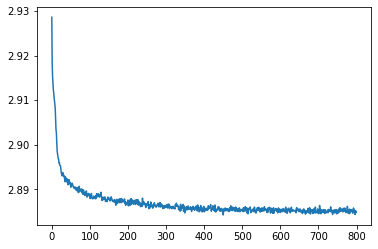

2.8820057198351376:   5%|██▊                                                     | 1013/20000 [00:09<03:07, 101.26it/s]

accuracy =  0.086 loss =  tensor(2.8867, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  10%|█████▋                                                  | 2013/20000 [00:19<02:49, 105.97it/s]

accuracy =  0.085 loss =  tensor(2.8822, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  15%|████████▍                                               | 3007/20000 [00:28<02:46, 102.16it/s]

accuracy =  0.084 loss =  tensor(2.8876, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  20%|███████████▏                                            | 4016/20000 [00:38<02:34, 103.58it/s]

accuracy =  0.078 loss =  tensor(2.8876, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  25%|██████████████                                          | 5018/20000 [00:48<02:28, 100.71it/s]

accuracy =  0.076 loss =  tensor(2.8809, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  30%|████████████████▊                                       | 6015/20000 [00:58<02:17, 101.56it/s]

accuracy =  0.084 loss =  tensor(2.8848, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  35%|███████████████████▋                                    | 7013/20000 [01:07<02:08, 101.45it/s]

accuracy =  0.07 loss =  tensor(2.8831, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  40%|██████████████████████▊                                  | 8021/20000 [01:17<02:03, 96.72it/s]

accuracy =  0.076 loss =  tensor(2.8827, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  45%|█████████████████████████▏                              | 9011/20000 [01:27<01:45, 104.24it/s]

accuracy =  0.084 loss =  tensor(2.8818, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  50%|███████████████████████████▌                           | 10014/20000 [01:36<01:35, 104.27it/s]

accuracy =  0.066 loss =  tensor(2.8875, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  55%|██████████████████████████████▎                        | 11016/20000 [01:46<01:24, 105.95it/s]

accuracy =  0.075 loss =  tensor(2.8856, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  60%|█████████████████████████████████                      | 12010/20000 [01:55<01:14, 107.84it/s]

accuracy =  0.095 loss =  tensor(2.8846, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  65%|███████████████████████████████████▊                   | 13019/20000 [02:04<01:04, 107.40it/s]

accuracy =  0.095 loss =  tensor(2.8890, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  70%|██████████████████████████████████████▌                | 14016/20000 [02:14<00:59, 100.41it/s]

accuracy =  0.077 loss =  tensor(2.8836, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  75%|█████████████████████████████████████████▎             | 15015/20000 [02:24<00:47, 104.11it/s]

accuracy =  0.081 loss =  tensor(2.8828, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  80%|████████████████████████████████████████████           | 16007/20000 [02:33<00:37, 105.61it/s]

accuracy =  0.085 loss =  tensor(2.8845, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  85%|██████████████████████████████████████████████▊        | 17017/20000 [02:42<00:28, 103.78it/s]

accuracy =  0.082 loss =  tensor(2.8895, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  90%|█████████████████████████████████████████████████▌     | 18009/20000 [02:52<00:18, 105.06it/s]

accuracy =  0.09 loss =  tensor(2.8899, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376:  95%|█████████████████████████████████████████████████████▏  | 19017/20000 [03:02<00:09, 99.63it/s]

accuracy =  0.078 loss =  tensor(2.8834, dtype=torch.float64, grad_fn=<NllLossBackward>)


2.8820057198351376: 100%|███████████████████████████████████████████████████████| 20000/20000 [03:11<00:00, 104.41it/s]

accuracy =  0.073 loss =  tensor(2.8889, dtype=torch.float64, grad_fn=<NllLossBackward>)


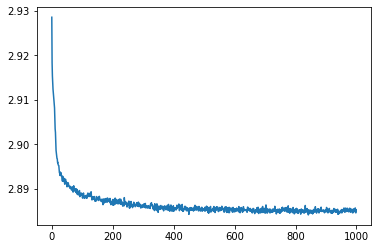

In [31]:
Epochs = 5
Steps = 20000
Batch_size = 1000
optimizer1 = torch.optim.Adam(Net_encoder.parameters())
optimizer2 = torch.optim.Adam(Net_encoder.parameters())
criterian = torch.nn.CrossEntropyLoss()

# print(training_set.sample(Batch_size)[0][0])

Net_encoder = Net_encoder.double()
classifier = classifier.double()

loss = 0
Loss_track = []
for epoch in range(Epochs):
    
    Loss_list = []
    for step in tqdm(range(Steps),desc = f"{loss}"):
        
        input_real, target = training_set.sample(Batch_size)
        
        input_real = input_real.astype(float)
        target = target.astype(float)
        
        input_real  = torch.tensor(input_real,  requires_grad = False, dtype = torch.float64)
        target = torch.tensor(target, requires_grad = False, dtype = torch.float64)
        
        latent_space = Net_encoder(input_real)
        output  = classifier(latent_space)
        
        output_pred = torch.nn.functional.softmax(output,dim = 1)
        loss = criterian(output_pred, target.long())
        Loss_list.append(loss.item())
        
        optimizer1.zero_grad()
        optimizer2.zero_grad()
        
        loss.backward()
        
        optimizer1.step()
        optimizer2.step()
        
        if (step+1) % 100 == 0:
            Loss_track.append(np.mean(Loss_list))
            Loss_list = []
        if (step+1) % 1000 == 0:
            validation_input, validation_outcome = validation_set.sample(Batch_size)
            
            latent_space = Net_encoder(input_real)
            output  = torch.argmax(classifier(latent_space), -1)
            validation_outcome = torch.tensor(validation_outcome)
            accuracy = (output == validation_outcome).sum().item() / Batch_size
            print("accuracy = ", accuracy, "loss = ", loss)
    plt.plot(Loss_track)
    plt.show()
    


In [32]:
torch.save(Net_encoder, 'check_point/Net_encoder2.pkl')  # entire net
torch.save(Net_encoder.state_dict(), 'check_point/Net_encoder_para2.pkl')  # parameters
torch.save(classifier, 'check_point/Net_decoder2.pkl')  # entire net
torch.save(classifier.state_dict(), 'check_point/Net_decoder_para2.pkl')  # parameters

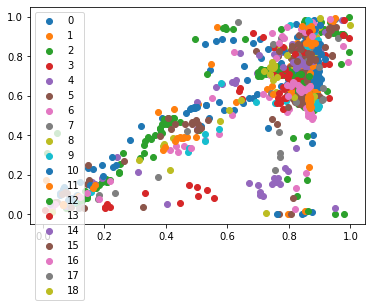

In [33]:
check_point_encoder = "check_point/Net_encoder_para2.pkl"
check_point_decoder = "check_point/Net_decoder_para2.pkl"
Net_encoder.load_state_dict(torch.load(check_point_encoder))
classifier.load_state_dict(torch.load(check_point_decoder))
classifier = classifier.double()

Group = []
genre_num = 19
Net_encoder.float()
for idx in range(genre_num):
    data = read_genre(idx)
    sample_num = int(np.sqrt(len(data)))
    genre_data_shuffled = shuffle(data)
    data = genre_data_shuffled.values
    
    sample = []
    for i in [3,4,5,6,7,9, 10,11,12,13,14,15]:
        column = diction[i]
        mean, var = full_music_data[column]
        temp = (data[:,i] - mean) / var
        sample.append(temp)
    
    data = np.vstack(sample).T.astype(np.double)
    sample_input = torch.tensor(data[:sample_num],requires_grad = False,dtype = torch.float)
    
    dots  = Net_encoder(sample_input).detach().numpy().T
    plt.scatter(x = dots[0], y = dots[1], label = f"{idx}")

plt.legend()
plt.show()
 

(83, 12)
(28, 12)
(217, 12)
(32, 12)
(79, 12)
(101, 12)
(35, 12)
(37, 12)
(26, 12)
(38, 12)
(87, 12)
(68, 12)
(48, 12)
(37, 12)
(18, 12)
(15, 12)
(36, 12)
(7, 12)
(16, 12)


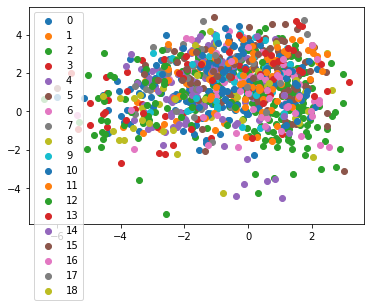

In [38]:


vect1 = np.array([ 0.24006461,  0.51178766,  0.31524798,  0.18438805,  0.48660936, -0.01623115,
                  -0.45638209, -0.26077016,  0.06859866,  0.10301124,  0.13256424, -0.02887823,])
vect2 = np.array([ 0.54121104,  -0.1981502,  0.47659031, -0.15101233,  -0.1080518,   0.1121257,
                   0.19148305, -0.17355167, -0.33586548, -0.15334972, -0.20160952, -0.38714675,])

Group = []
genre_num = 19
for idx in range(genre_num):
    data = read_genre(idx)
    sample_num = int(np.sqrt(len(data)))
    genre_data_shuffled = shuffle(data)
    data = genre_data_shuffled.values
    
    sample = []
    for i in [3,4,5,6,7,9, 10,11,12,13,14,15]:
        column = diction[i]
        mean, var = full_music_data[column]
        temp = (data[:,i] - mean) / var
        sample.append(temp)
    
    data = np.vstack(sample).T.astype(np.double)
    sample_input = data[:sample_num]
    print(sample_input.shape)
    
    x_axis = np.sum(sample_input * vect1, axis = -1)
    y_axis = np.sum(sample_input * vect2, axis = -1)

    
    plt.scatter(x = x_axis, y = y_axis, label = f"{idx}")

plt.legend()
plt.show()
 